In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/train-csv/train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.shape

(7613, 5)

In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df.drop(columns=['keyword','location'],inplace=True)

In [7]:
df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [9]:
df.groupby('id').cumcount()

0       0
1       0
2       0
3       0
4       0
       ..
7608    0
7609    0
7610    0
7611    0
7612    0
Length: 7613, dtype: int64

In [10]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_pandas_datetime_CAPI',
 '_pandas_parser_CAPI',
 '_testing',
 '_typing',
 '_version_meson',
 'annota

In [11]:
df.head(10)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
5,8,#RockyFire Update => California Hwy. 20 closed...,1
6,10,#flood #disaster Heavy rain causes flash flood...,1
7,13,I'm on top of the hill and I can see a fire in...,1
8,14,There's an emergency evacuation happening now ...,1
9,15,I'm afraid that the tornado is coming to our a...,1


In [12]:
# df.reset_index(drop=True)
df['id']=df.index

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,id,text,target
0,0,Our Deeds are the Reason of this #earthquake M...,1
1,1,Forest fire near La Ronge Sask. Canada,1
2,2,All residents asked to 'shelter in place' are ...,1
3,3,"13,000 people receive #wildfires evacuation or...",1
4,4,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

# **3. Text Preprocessing**

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming or lemmatization

In [16]:
import nltk
nltk.download('punkt')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize

wtk=word_tokenize
wtk('Hi I am KAISAKSAK')

['Hi', 'I', 'am', 'KAISAKSAK']

In [20]:
# from nltk.stem import WordNetLemmatizer
# wnl=WordNetLemmatizer()

# print(wnl.lemmatize('going','v'))
#We have to do tagging for pos in lemmatization in nltk

In [21]:
import spacy
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')


In [22]:
def preprocess(text):
  text=text.lower()
  text=wtk(text)
  txt=[]
  for i in text:
    if i.isalnum():
     txt.append(i)
  words=[]
  for i in txt:
    if i not in stopwords.words('english'):
       words.append(i)
  words=" ".join(words)
  word=nlp(words)
  lemma=[]
  for i in word:
    lemma.append(i.lemma_)
  return lemma

In [23]:
preprocess("going to ate the dinner at table running at counter no. 202 ")

['going', 'eat', 'dinner', 'table', 'run', 'counter', '202']

We have used lemmatization in spacy as for doing so in nltk we have to manually or by any function specify the part of speech which is cumbersome so spacy is automatic just like phone camera!

In [24]:
df['preprocessed_text']=df['text'].apply(preprocess)

In [25]:
df.head()

,id,text,target,preprocessed_text
0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, may, allah, forgive..."
1,1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,2,All residents asked to 'shelter in place' are ...,1,"[resident, ask, place, notify, officer, evacua..."
3,3,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfire, evacuation, order,..."
4,4,Just got sent this photo from Ruby #Alaska as ...,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."


In [26]:
df

,id,text,target,preprocessed_text
0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, may, allah, forgive..."
1,1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,2,All residents asked to 'shelter in place' are ...,1,"[resident, ask, place, notify, officer, evacua..."
3,3,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfire, evacuation, order,..."
4,4,Just got sent this photo from Ruby #Alaska as ...,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...
7608,7608,Two giant cranes holding a bridge collapse int...,1,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,7609,@aria_ahrary @TheTawniest The out of control w...,1,"[thetawni, control, wild, fire, california, ev..."
7610,7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[utc, 5, km, volcano, hawaii, http]"
7611,7611,Police investigating after an e-bike collided ...,1,"[police, investigate, collide, car, little, po..."


In [27]:
df[df['target']==1]['preprocessed_text']

0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, ask, place, notify, officer, evacua...
3       [people, receive, wildfire, evacuation, order,...
4       [get, send, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, hold, bridge, collapse, ne...
7609    [thetawni, control, wild, fire, california, ev...
7610                  [utc, 5, km, volcano, hawaii, http]
7611    [police, investigate, collide, car, little, po...
7612    [late, home, raze, northern, california, wildf...
Name: preprocessed_text, Length: 3271, dtype: object

In [28]:
disaster_corpus=[]
for i in df[df['target']==1]['preprocessed_text']:
  for msg in i:
    disaster_corpus.append(msg)


In [29]:
disaster_corpus

['deed',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'we',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'resident',
 'ask',
 'place',
 'notify',
 'officer',
 'evacuation',
 'shelter',
 'place',
 'order',
 'expect',
 'people',
 'receive',
 'wildfire',
 'evacuation',
 'order',
 'california',
 'get',
 'send',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfire',
 'pour',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'direction',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfire',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'cause',
 'flash',
 'flooding',
 'street',
 'manitou',
 'colorado',
 'spring',
 'area',
 'top',
 'hill',
 'see',
 'fire',
 'wood',
 'emergency',
 'evacuation',
 'happen',
 'building',
 'across',
 'street',
 'afraid',
 'tornado',
 'come',
 'area',
 'three',
 'people',
 'die',
 'heat',
 'wave',
 'far',
 'haha',
 'south',
 'tampa',
 'getting',
 'flood',
 'wait',
 'second',
 'live',
 'south',
 'tampa'

In [30]:
# df['preprocessed_text'].apply()

In [31]:
from collections import Counter
# df['preprocessed_text'].apply(Counter)
print(Counter(disaster_corpus).most_common(40))

[('http', 2407), ('fire', 265), ('kill', 153), ('news', 141), ('amp', 135), ('via', 121), ('disaster', 118), ('get', 117), ('crash', 113), ('california', 111), ('bomb', 108), ('police', 106), ('https', 106), ('people', 105), ('family', 104), ('suicide', 104), ('attack', 103), ('home', 102), ('train', 101), ('like', 99), ('say', 94), ('storm', 92), ('flood', 89), ('go', 88), ('building', 87), ('hiroshima', 87), ('year', 83), ('wildfire', 79), ('burn', 78), ('2', 78), ('emergency', 74), ('accident', 73), ('two', 72), ('bombing', 72), ('video', 72), ('car', 71), ('mh370', 71), ('nuclear', 70), ('one', 69), ('collapse', 69)]


In [32]:
blessing_corpus=[]
for i in df[df['target']==0]['preprocessed_text']:
  for msg in i:
    blessing_corpus.append(msg)

In [33]:
print(Counter(blessing_corpus).most_common(40))

[('http', 1969), ('get', 309), ('like', 293), ('https', 234), ('amp', 209), ('go', 207), ('new', 168), ('one', 135), ('make', 130), ('see', 128), ('body', 114), ('love', 108), ('come', 106), ('say', 106), ('would', 105), ('video', 102), ('know', 100), ('good', 99), ('think', 98), ('via', 97), ('want', 96), ('time', 95), ('day', 93), ('people', 93), ('fire', 89), ('look', 88), ('bag', 88), ('can', 87), ('scream', 87), ('2', 87), ('burn', 87), ('take', 85), ('well', 85), ('back', 85), ('emergency', 82), ('full', 81), ('let', 80), ('man', 77), ('wreck', 77), ('youtube', 76)]


In [34]:
pd.DataFrame(Counter(blessing_corpus).most_common(40))

,0,1
0,http,1969
1,get,309
2,like,293
3,https,234
4,amp,209
5,go,207
6,new,168
7,one,135
8,make,130
9,see,128


In [35]:
pd.DataFrame(Counter(disaster_corpus).most_common(40))

,0,1
0,http,2407
1,fire,265
2,kill,153
3,news,141
4,amp,135
5,via,121
6,disaster,118
7,get,117
8,crash,113
9,california,111


Text(0.5, 1.0, 'Disaster Words frequency')

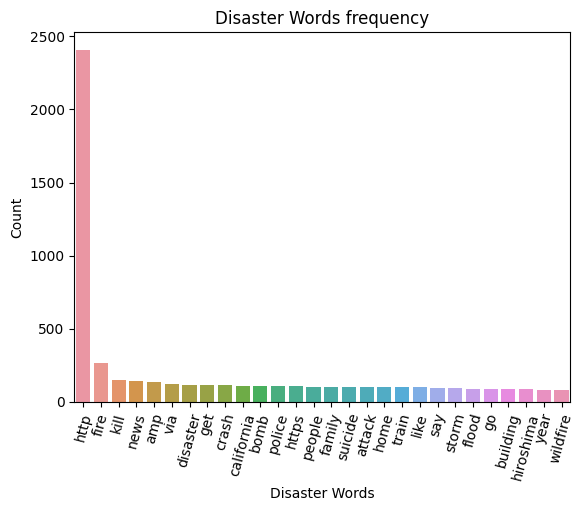

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=pd.DataFrame(Counter(disaster_corpus).most_common(28))[0],y=pd.DataFrame(Counter(disaster_corpus).most_common(28))[1])
plt.xticks(rotation=75)
plt.xlabel('Disaster Words')
plt.ylabel('Count')
plt.title('Disaster Words frequency')

Text(0.5, 1.0, 'Blessing Words frequency')

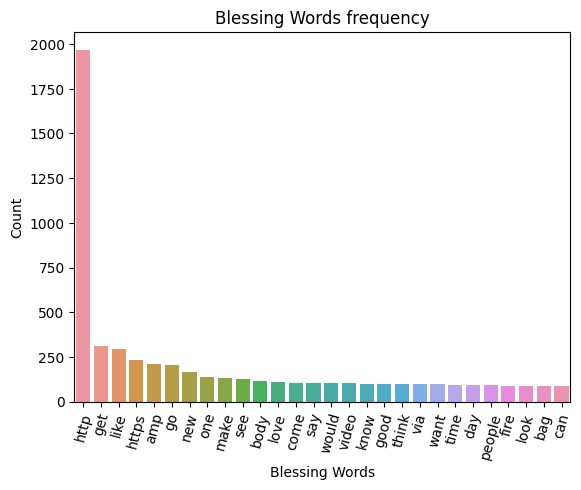

In [37]:
sns.barplot(x=pd.DataFrame(Counter(blessing_corpus).most_common(28))[0],y=pd.DataFrame(Counter(blessing_corpus).most_common(28))[1])
plt.xticks(rotation=75)
plt.xlabel('Blessing Words')
plt.ylabel('Count')
plt.title('Blessing Words frequency')

In [38]:
df.head()

,id,text,target,preprocessed_text
0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, may, allah, forgive..."
1,1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,2,All residents asked to 'shelter in place' are ...,1,"[resident, ask, place, notify, officer, evacua..."
3,3,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfire, evacuation, order,..."
4,4,Just got sent this photo from Ruby #Alaska as ...,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."


'http' word in occuring in both disaster and blessing approximately same number of times so we need to remove it so it will not create a problem.

In [39]:
list=['deed','http','maker','woolen']
list

['deed', 'http', 'maker', 'woolen']

In [40]:
def remove_http(list):
 new_list=[]
 for words in list:
   if words!='http':
      new_list.append(words)
 return new_list

In [41]:
remove_http(list)

['deed', 'maker', 'woolen']

In [42]:
df.head()

,id,text,target,preprocessed_text
0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, may, allah, forgive..."
1,1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,2,All residents asked to 'shelter in place' are ...,1,"[resident, ask, place, notify, officer, evacua..."
3,3,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfire, evacuation, order,..."
4,4,Just got sent this photo from Ruby #Alaska as ...,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."


In [43]:
df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:remove_http(x))

In [44]:
blessing_corpus=[]
for i in df[df['target']==0]['preprocessed_text']:
  for msg in i:
    blessing_corpus.append(msg)
disaster_corpus=[]
for i in df[df['target']==0]['preprocessed_text']:
  for msg in i:
    disaster_corpus.append(msg)

In [45]:
(Counter(disaster_corpus).most_common(5))

[('get', 309), ('like', 293), ('https', 234), ('amp', 209), ('go', 207)]

## I am making a function so as when passed any new test data it got preprocessed automatically.

In [46]:
def test_modify(df):
   df.drop(columns=['keyword','location'],inplace=True)
   df['id']=df.index
   df['preprocessed_text']=df['text'].apply(preprocess)
   df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:remove_http(x))

# **Model Building**

In [47]:
#Changing text data into number:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=8357)

In [48]:
' '.join(df['preprocessed_text'][0])

'deed reason earthquake may allah forgive we'

In [49]:
df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:' '.join(x))

In [50]:
df.head()

,id,text,target,preprocessed_text
0,0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive we
1,1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,2,All residents asked to 'shelter in place' are ...,1,resident ask place notify officer evacuation s...
3,3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,4,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...


In [51]:
X=tfidf.fit_transform(df['preprocessed_text']).toarray()

In [52]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
Y=df['target'].values

In [54]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['text','target','id'])
y=df['target']


In [55]:
x

,preprocessed_text
0,deed reason earthquake may allah forgive we
1,forest fire near la ronge sask canada
2,resident ask place notify officer evacuation s...
3,people receive wildfire evacuation order calif...
4,get send photo ruby alaska smoke wildfire pour...
...,...
7608,two giant crane hold bridge collapse nearby home
7609,thetawni control wild fire california even nor...
7610,utc 5 km volcano hawaii
7611,police investigate collide car little portugal...


# **BERT model building**

In [56]:
!pip install tensorflow_text

In [57]:
# Import libraries
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

In [58]:
# preprocess_url= "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3"
# encoder_url="https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/bert-en-uncased-l-12-h-768-a-12/versions/2"

In [59]:
# model_path = "/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2"
# preprocess_path = "/kaggle/input/bert/tensorflow2/en-cased-preprocess/3"

In [60]:
# def bert_transform(text):
#  text=[text]
#  preprocessed_text=bert_preprocess_model(text)
#  return bert_encoder_model(preprocessed_text)['pooled_output']

In [61]:
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
# preprocessor = hub.KerasLayer(preprocess_path)
# encoder_inputs = preprocessor(text_input)
# encoder = hub.KerasLayer(
#     model_path,
#     trainable=True)
# outputs = encoder(encoder_inputs)
# pooled_output = outputs["pooled_output"]      # [batch_size, 512].
# sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 512].
# dense_1 = tf.keras.layers.Dense(128 , activation='relu')(pooled_output)
# dropout = tf.keras.layers.Dropout(0.7 , name="dropout1")(pooled_output)
# dense_2 = tf.keras.layers.Dense(64 , activation='relu')(dropout)
# dropout = tf.keras.layers.Dropout(0.5 , name="dropout2")(dense_2)

# dense_out = tf.keras.layers.Dense(1 , activation='sigmoid', name='output')(dropout)


# model = tf.keras.Model(inputs=text_input, outputs=dense_out)

In [62]:
# model.summary()

In [63]:
# #compiling the Neural Network
# model.compile(optimizer='adam',
#                loss='binary_crossentropy',
#               metrics=['accuracy'])

In [64]:
# history=model.fit(x,y,validation_split=0.4,epochs=10)

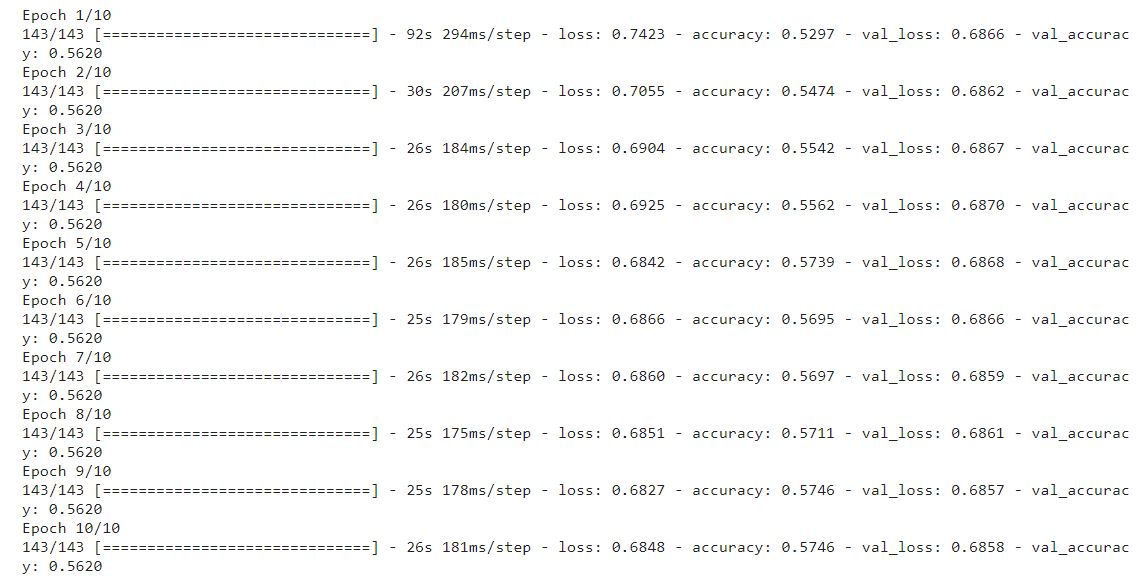




Our initial output from BERT 😤😤

In [65]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/train-csv/train.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2/saved_model.pb
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2/keras_metadata.pb
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2/assets/vocab.txt
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2/variables/variables.index
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2/variables/variables.data-00000-of-00001
/kaggle/input/bert/tensorflow2/en-cased-preprocess/3/saved_model.pb
/kaggle/input/bert/tensorflow2/en-cased-preprocess/3/keras_metadata.pb
/kaggle/input/bert/tensorflow2/en-cased-preprocess/3/assets/vocab.txt
/kaggle/input/bert/tensorflow2/en-cased-preprocess/3/variables/variables.index
/kaggle/input/bert/tensorflow2/en-cased-preprocess/3/variables/variables.data-00000-of-00001
/kaggl

In [66]:
bert_preprocess_model = tf.saved_model.load('/kaggle/input/bert/tensorflow2/en-cased-preprocess/3')
# text_test = ['this is such an amazing movie!']
# text_preprocessed = bert_preprocess_model(text_test)
#It is working fine till here

In [67]:
# text_preprocessed

Loading BERT!

In [68]:
bert_model = tf.saved_model.load('/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2')

In [69]:
# bert_results = bert_model(text_preprocessed)
# bert_results
#It is working fine till here

In [70]:
def build_classifier_model():
    text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
    preprocessing_layer=hub.KerasLayer(bert_preprocess_model,name='preprocessing')
    encoder_inputs=preprocessing_layer(text_input)
    encoder=hub.KerasLayer(bert_model,trainable=True,name='Bert_encoder')
    outputs=encoder(encoder_inputs)
    net=outputs['pooled_output']
    net=tf.keras.layers.Dropout(0.1)(net)
    net=tf.keras.layers.Dense(1,activation=None,name='classifier')(net)
    return tf.keras.Model(text_input,net)
    

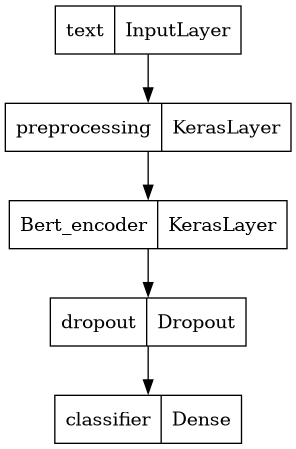

In [71]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)

In [72]:
#compiling the Neural Network
classifier_model.compile(optimizer='adam',
               loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
history=classifier_model.fit(x,y,validation_split=0.4,epochs=5)

Epoch 1/5
143/143 [==============================] - 83s 276ms/step - loss: 6.5422 - accuracy: 0.5759 - val_loss: 6.7554 - val_accuracy: 0.5620
Epoch 2/5
143/143 [==============================] - 28s 193ms/step - loss: 6.5422 - accuracy: 0.5759 - val_loss: 6.7554 - val_accuracy: 0.5620
Epoch 3/5
143/143 [==============================] - 25s 177ms/step - loss: 6.5422 - accuracy: 0.5759 - val_loss: 6.7554 - val_accuracy: 0.5620
Epoch 4/5
143/143 [==============================] - 24s 169ms/step - loss: 6.5422 - accuracy: 0.5759 - val_loss: 6.7554 - val_accuracy: 0.5620
Epoch 5/5
143/143 [==============================] - 24s 165ms/step - loss: 6.5422 - accuracy: 0.5759 - val_loss: 6.7554 - val_accuracy: 0.5620


## **Using Tf-idf and then using Naive Bayes**

In [74]:
# #Changing text data into number:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer()

In [75]:
df['preprocessed_text'][0]

'deed reason earthquake may allah forgive we'

In [76]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
# X=tfidf.fit_transform(df['preprocessed_text']).toarray()

In [78]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
Y=df['target'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=2458)

In [81]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [82]:
X_train.shape

(5329, 8357)

In [83]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [84]:
Y_pred=mnb.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8143607705779334

In [86]:
df2=pd.read_csv('/kaggle/input/test-csv/test.csv')
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [87]:
df2.shape

(3263, 4)

In [88]:
test_modify(df2) #our custom made function.

In [89]:
df2.head()

,id,text,preprocessed_text
0,0,Just happened a terrible car crash,"[happen, terrible, car, crash]"
1,1,"Heard about #earthquake is different cities, s...","[hear, earthquake, different, city, stay, safe..."
2,2,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, geese, flee, across..."
3,3,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, light, spokane, wildfire]"
4,4,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kill, 28, china, taiwan]"


In [90]:
df2.shape

(3263, 3)

In [91]:
#  X_test=df.drop(columns=['text','target','id'])
x_test=df2.drop(columns=['text','id'])

In [92]:
x_test.shape

(3263, 1)

In [93]:
# x_test=x_test['preprocessed_text']

In [94]:
df2['preprocessed_text']=df2['preprocessed_text'].apply(lambda x:' '.join(x))

In [95]:
df2['preprocessed_text']

0                               happen terrible car crash
1       hear earthquake different city stay safe everyone
2       forest fire spot pond geese flee across street...
3                       apocalypse light spokane wildfire
4                   typhoon soudelor kill 28 china taiwan
                              ...                        
3258    earthquake safety los angeles safety fastener ...
3259    storm ri worse last hurricane city amp 3others...
3260                        green line derailment chicago
3261              meg issue hazardous weather outlook hwo
3262    cityofcalgary activate municipal emergency pla...
Name: preprocessed_text, Length: 3263, dtype: object

In [96]:
x_test=tfidf.fit_transform(df2['preprocessed_text']).toarray()

In [97]:
x_test.shape

(3263, 8357)

In [98]:
# Y_pred=mnb.predict(X_test)

In [99]:
# from sklearn.metrics import accuracy_score
# accuracy_score(Y_pred)

In [100]:
sample_submission = pd.read_csv("/kaggle/input/sample-submission/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [101]:
sample_submission['id']=sample_submission.index

In [102]:
sample_submission.shape

(3263, 2)

In [103]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__git_version__',
 '__loader__',

In [104]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
x_test.shape

(3263, 8357)

In [106]:
sample_submission.shape

(3263, 2)

In [107]:
y_pred=mnb.predict(x_test)

In [108]:
sample_submission["target"] = y_pred

In [109]:
sample_submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
3258,3258,1
3259,3259,1
3260,3260,1
3261,3261,0


In [110]:
sample_submission.to_csv("submission.csv", index=False)